## Deutsch's Algorithm
Based on:
1. Kaye, P., Laflamme, R., & Mosca, M. (2007). *An Introduction to Quantum Computing*. Oxford University Press.
2. [Video: Deutsch's Algorithm: An Introduction to Quantum Computing Oracles](https://www.youtube.com/watch?v=7MdEHsRZxvo)


Imagine we have a function $f: \{0, 1\} \rightarrow \{0, 1\}$. This function can also be thought of as a  <strong>Quantum Oracle</strong>. 

An **oracle** is a "black-box" function that we can query to retrieve information about a mathematical problem. 

### Quantum Oracle

A <strong> Quantum Oracle </strong> is the quantum equivalent of a classical oracle:
- It can be described as a quantum operator $U_f$ that acts upon a two-qubit system:
$$U_f \ket{x, y} = \ket{x, y \oplus f(x)}$$ 

We do not know anything about this function, and cannot pry into its inner workings. We can however, send in a bit and read the output. Our task is to determine wether the function is **constant** or **balanced**. 

- In a **constant** function, the output is the same no matter the input. (Constant 1 or constant 0)
- In a **balanced** function, the function returns 1s and 0s in equal quantity


<strong>Classical Computers: </strong> need 2 queries of the function to determine if $f(0) = f(1) $. It needs to calculate both $f(0)$ and $f(1)$. 

<strong> A Quantum Computer </strong>using Deutsch's algorithm, can determine $f$ with just <strong> one query </strong> to the quantum oracle, by exploiting superposition and interference. It thus possesses a <strong>Quantum Advantage</strong>.


### Phase Oracles
A special case of quantum oracles are <strong>phase oracles</strong>. When we set the target qubit y to the minus state $y = \ket{-} $ we get what is known as phase kickback. Here, a phase is applied to the input qubit, instead of the function being applied to the target qubit. 

$$ \ket{x} \ket{-} \rightarrow^{U_f} (-1)^{f(x)}\ket{x}\ket{-}$$

This result is used in many quantum algorithms

Proving the previous statement
$$ \ket{x}\ket{-} = \ket{x} \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}) $$

$$ \frac{1}{\sqrt{2}}(\ket{x}\ket{0} - \ket{x}\ket{1}) \rightarrow U_f \frac{1}{\sqrt{2}}(\ket{x}\ket{0} - \ket{x}\ket{1})$$

The unitary operator/matrix $U_f$, being a linear operator, can be distributed among the terms of the sum
$$ \frac{1}{\sqrt{2}}(U_f \ket{x}\ket{0} - U_f \ket{x}\ket{1})$$ 

Recalling a quantum oracle's description: $U_f \ket{x, y} = \ket{x, y \oplus f(x)}$ 
$$ \frac{1}{\sqrt{2}}(\ket{x}\ket{0 \oplus f(x)} - \ket{x}\ket{1\oplus f(x)})$$ 
This then becomes 

$$ \frac{1}{\sqrt{2}} \left( \ket{x}\ket{f(x)} - \ket{x}\ket{\overline{f(x)}} \right)$$ 

&nbsp;

$$
\\= 
\begin{cases} 
\ket{x}\ket{-} & : f(x) = 0 \\[10pt]
\frac{1}{\sqrt{2}} \big( \ket{x}\ket{1} - \ket{x}\ket{0} \big) & : f(x) = 1
\end{cases}
$$



We can further simplify the last expression, where $f(x) = 1$ 

$$ \frac{1}{\sqrt{2}} \big( \ket{x}\ket{1} - \ket{x}\ket{0} \big) = -\frac{1}{\sqrt{2}}(\ket{x}\ket{0} - \ket{x}\ket{1}) = -\ket{x}\ket{-}$$

Thus: 
$$
\\= 
\begin{cases} 
\ket{x}\ket{-} & : f(x) = 0 \\[10pt]
-\ket{x}\ket{-} & : f(x) = 1
\end{cases}
$$

&nbsp;

&nbsp;

These findings are generalize by the following expression: 
$$=(-1)^{f(x)}\ket{x}\ket{-}$$

In [63]:
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer, AerSimulator

# Standard library imports
import os
import sys

# Start from the current directory
current_dir = os.path.abspath(os.getcwd())

# Traverse up until the target folder is found
target_folder_name = "quantum-information-projects"

while True:
    if os.path.basename(current_dir) == target_folder_name:
        sys.path.append(current_dir)
        print(f"Project root found and added to sys.path: {current_dir}")
        break
    parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
    if parent_dir == current_dir:  # Reached the root of the file system
        print(f"Error: '{target_folder_name}' folder not found.")
        break
    current_dir = parent_dir


Project root found and added to sys.path: c:\Users\arma2\Desktop\Programming Projects\Portfolio_Projects\quantum-information-projects\quantum-information-projects


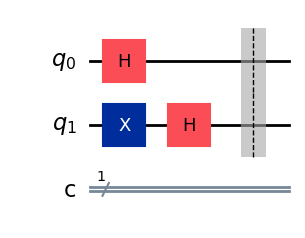

In [64]:
# Initializing the circuit
qc = QuantumCircuit(2, 1)

# Building the circuit before U_f
qc.h(0)

qc.x(1)
qc.h(1)
qc.barrier()

qc.draw('mpl')

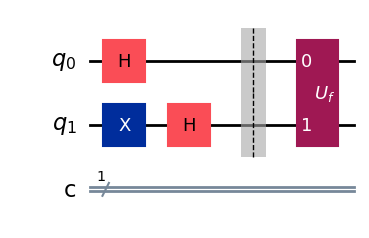

In [65]:
# Generalized U_f circuit for any function f(x)
def uf_circuit(case: int):
    uf = QuantumCircuit(2)  # Create a 2-qubit circuit named U_f

    # Implement the oracle based on the given function
    
    # case 1: 0, 0
    # case 2: 0, 1
    # case 3: 1, 0
    if case in [2, 3]: 
        uf.cx(0, 1)
    if case in [3, 4]:
        uf.x(1)
    
    # Convert the circuit to a gate
    return uf.to_gate(label=r"$U_f$")

uf_gate = uf_circuit(1)

qc.append(uf_gate, [0, 1])
qc.draw('mpl')

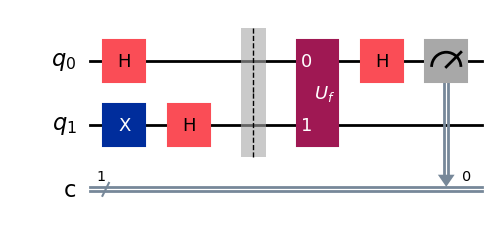

In [66]:
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

### **Understanding the Output**

Recalling the literature on the Deutsch algorithm:

- If the output of the oracle is `1`:
  - The function $f(x)$ is **balanced** (i.e., $ f(x) = 1 $ for one input and $ f(x) = 0 $ for the other).
  
- If the output of the oracle is `0`:
  - The function $ f(x) $ is **constant** (i.e., $ f(x) $ is the same for all inputs).

The Deutsch algorithm achieves this distinction with a **single query** to the oracle, leveraging quantum interference to identify the global property of $ f(x) $.


In [71]:
from src.utils import transpile_qc, run_circuit, create_noise_model
import src.utils as utils
import importlib; importlib.reload(utils)

transpiled_qc = transpile_qc(qc)
noise_m = utils.create_noise_model(p_depol=0.01)

# Now executing the circuit
countss = run_circuit(transpiled_qc).get_counts() # Without noise
noisy_countss = run_circuit(transpiled_qc, noise_model=noise_m).get_counts() # With noise


In [82]:
# Determine the most likely measurement result
result = max(countss, key=countss.get)  # Find the key with the highest count

if result == '0':
    print(f"The function f(x) is balanced")
elif result == '1':
    print(f"The function f(x) is unbalanced")

The function f(x) is balanced
